In [1]:
import pandas as pd
import numpy as np

# Titanic veri setini yükleme
data = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv')

# Yaş sütununu alalım ve eksik değerleri çıkaralım
ages = data['Age'].dropna().values

# Yaş verilerinin ortalamasını, medyanını ve standart sapmasını hesaplama
mean_age = np.mean(ages)
median_age = np.median(ages)
std_age = np.std(ages)

print(f"Ortalama yaş: {mean_age}")
print(f"Medyan yaş: {median_age}")
print(f"Standart sapma: {std_age}")

# Yaş grupları tanımlama
age_bins = [0, 12, 18, 25, 35, 60, 80]
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Middle Age', 'Senior']

# Yaş gruplarını atama
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

# Her yaş grubundaki yolcu sayısını `for` döngüsü ile hesaplama
age_group_counts = {}
for label in age_labels:
    count = data[data['AgeGroup'] == label]['AgeGroup'].count()
    age_group_counts[label] = count

print("Yaş gruplarına göre yolcu sayısı:")
print(age_group_counts)

# Yaş gruplarına göre hayatta kalma oranını `for` döngüsü ile hesaplama
survival_rate_by_age_group = {}
for label in age_labels:
    group_data = data[data['AgeGroup'] == label]
    survival_rate = group_data['Survived'].mean()
    survival_rate_by_age_group[label] = survival_rate

print("Yaş gruplarına göre hayatta kalma oranı:")
print(survival_rate_by_age_group)


Ortalama yaş: 29.69911764705882
Medyan yaş: 28.0
Standart sapma: 14.516321150817316
Yaş gruplarına göre yolcu sayısı:
{'Child': 69, 'Teen': 70, 'Young Adult': 162, 'Adult': 196, 'Middle Age': 195, 'Senior': 22}
Yaş gruplarına göre hayatta kalma oranı:
{'Child': 0.5797101449275363, 'Teen': 0.42857142857142855, 'Young Adult': 0.3333333333333333, 'Adult': 0.42346938775510207, 'Middle Age': 0.4, 'Senior': 0.22727272727272727}


In [ ]:
#Covid Örnek

Ortalama günlük yeni vaka: 10287.18572292801
Medyan günlük yeni vaka: 0.0
Standart sapma: 53458.42127227823
Vaka gruplarına göre gün sayısı:
{'0-1K': 24, '1K-5K': 0, '5K-10K': 16, '10K-50K': 35, '50K+': 33}
Vaka gruplarına göre ölüm oranı:
{'0-1K': 0.875, '1K-5K': nan, '5K-10K': 109.9375, '10K-50K': 303.45714285714286, '50K+': 609.1515151515151}


C:\Users\User\AppData\Local\Temp\ipykernel_16752\354945251.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turkey_data['CaseGroup'] = pd.cut(turkey_data['new_cases'], bins=case_bins, labels=case_labels)


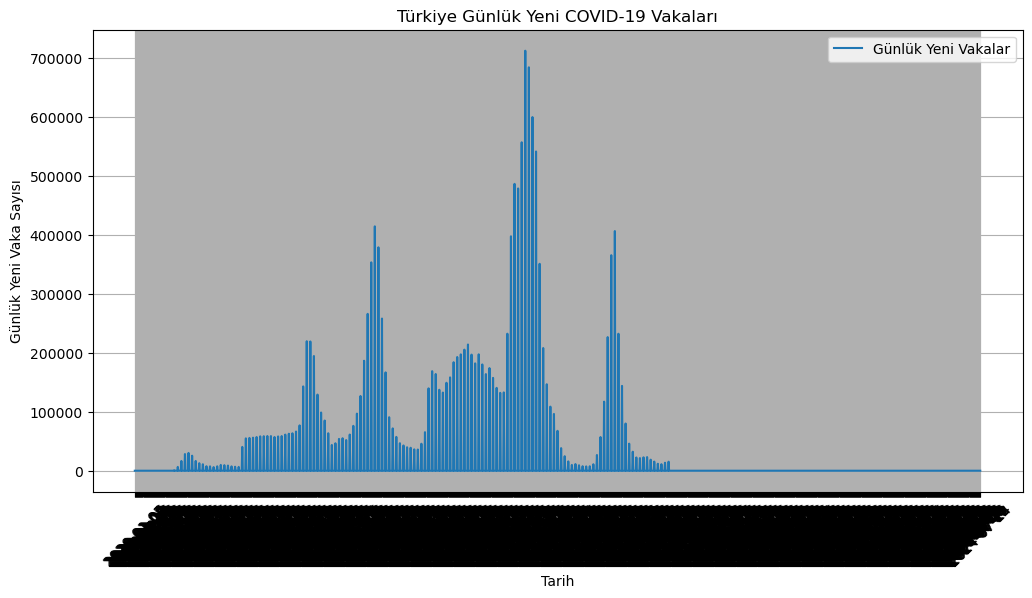

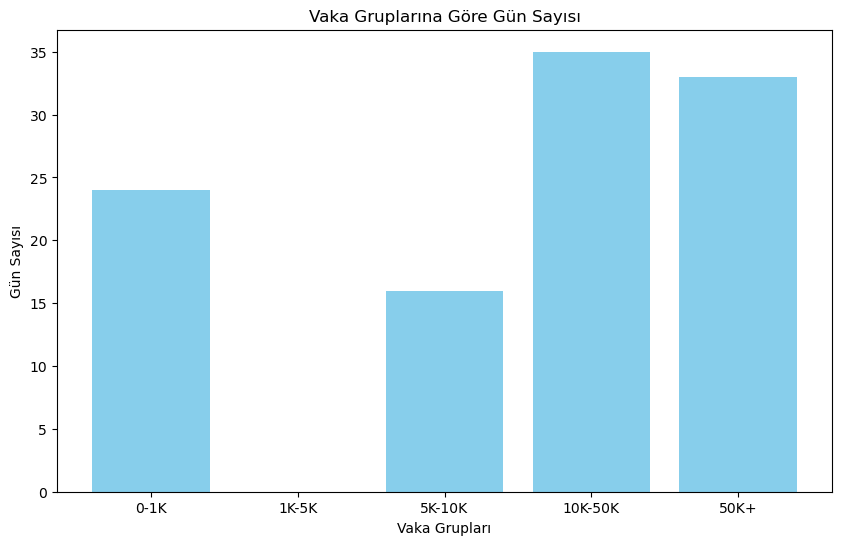

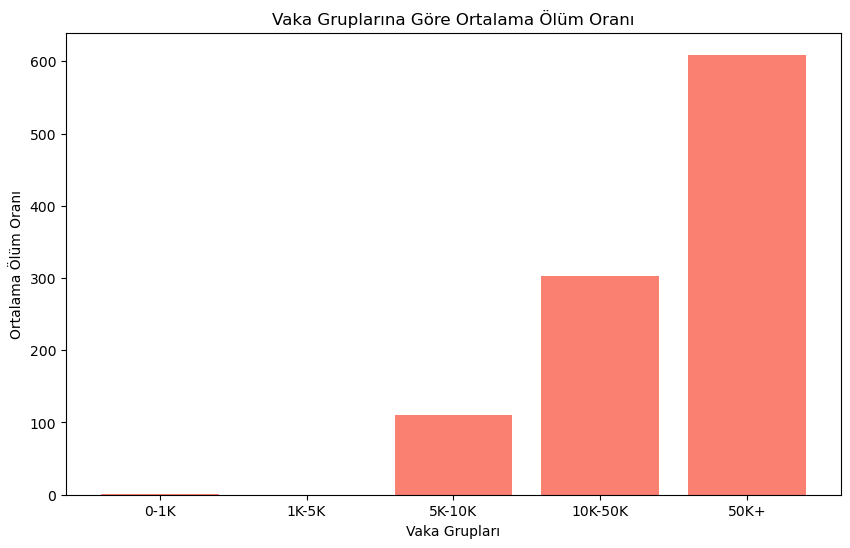

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Our World in Data COVID-19 veri setini yükleme
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
data = pd.read_csv(url)

# Belirli bir ülke için günlük yeni vaka verilerini alalım (örneğin, Türkiye)
turkey_data = data[data['location'] == 'Turkey']
daily_cases = turkey_data['new_cases'].dropna().values

# Günlük yeni vaka verilerinin ortalamasını, medyanını ve standart sapmasını hesaplama
mean_cases = np.mean(daily_cases)
median_cases = np.median(daily_cases)
std_cases = np.std(daily_cases)

print(f"Ortalama günlük yeni vaka: {mean_cases}")
print(f"Medyan günlük yeni vaka: {median_cases}")
print(f"Standart sapma: {std_cases}")

# Vaka sayısı grupları tanımlama
case_bins = [0, 1000, 5000, 10000, 50000, 100000]
case_labels = ['0-1K', '1K-5K', '5K-10K', '10K-50K', '50K+']

# Vaka gruplarını atama
turkey_data['CaseGroup'] = pd.cut(turkey_data['new_cases'], bins=case_bins, labels=case_labels)

# Her vaka grubundaki gün sayısını `for` döngüsü ile hesaplama
case_group_counts = {}
for label in case_labels:
    count = turkey_data[turkey_data['CaseGroup'] == label]['CaseGroup'].count()
    case_group_counts[label] = count

print("Vaka gruplarına göre gün sayısı:")
print(case_group_counts)

# Vaka gruplarına göre ölüm oranını `for` döngüsü ile hesaplama
death_rate_by_case_group = {}
for label in case_labels:
    group_data = turkey_data[turkey_data['CaseGroup'] == label]
    death_rate = group_data['new_deaths'].mean()
    death_rate_by_case_group[label] = death_rate

print("Vaka gruplarına göre ölüm oranı:")
print(death_rate_by_case_group)

# Zaman içinde günlük yeni vaka sayısını gösteren çizgi grafiği
plt.figure(figsize=(12, 6))
plt.plot(turkey_data['date'], turkey_data['new_cases'], label='Günlük Yeni Vakalar')
plt.xlabel('Tarih')
plt.ylabel('Günlük Yeni Vaka Sayısı')
plt.title('Türkiye Günlük Yeni COVID-19 Vakaları')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Vaka gruplarına göre gün sayısını gösteren bar grafiği
plt.figure(figsize=(10, 6))
plt.bar(case_group_counts.keys(), case_group_counts.values(), color='skyblue')
plt.xlabel('Vaka Grupları')
plt.ylabel('Gün Sayısı')
plt.title('Vaka Gruplarına Göre Gün Sayısı')
plt.show()

# Vaka gruplarına göre ortalama ölüm oranını gösteren bar grafiği
plt.figure(figsize=(10, 6))
plt.bar(death_rate_by_case_group.keys(), death_rate_by_case_group.values(), color='salmon')
plt.xlabel('Vaka Grupları')
plt.ylabel('Ortalama Ölüm Oranı')
plt.title('Vaka Gruplarına Göre Ortalama Ölüm Oranı')
plt.show()
